<a href="https://colab.research.google.com/github/Naegoya/PCVK-SYAFA/blob/main/Week12_Kelompok_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KELOMPOK 8

Nama Anggota Kelompok :

1. Mirabell Joice Laura (2141720174)

2. M. Edwin Isa Alfais (2141720193)

3. Nabilah Amaalina Syafa (2141720198)

#TUGAS PRAKTIKUM

##Langkah 1
Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama "Week12.ipynb". Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Langkah 2
Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini.
Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa
gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

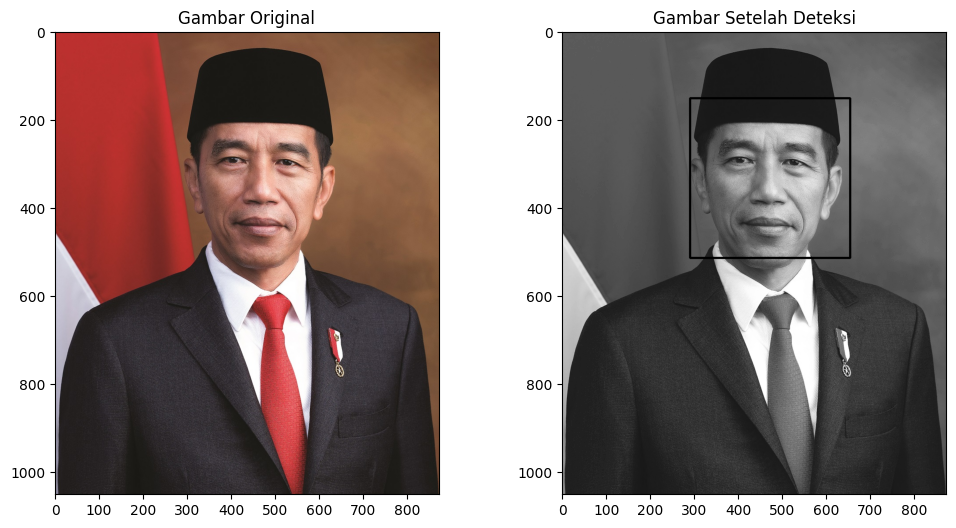

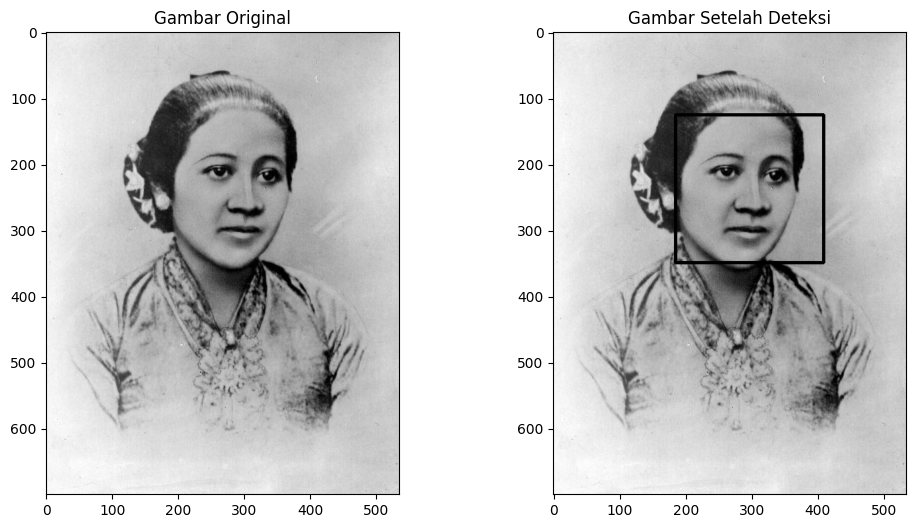

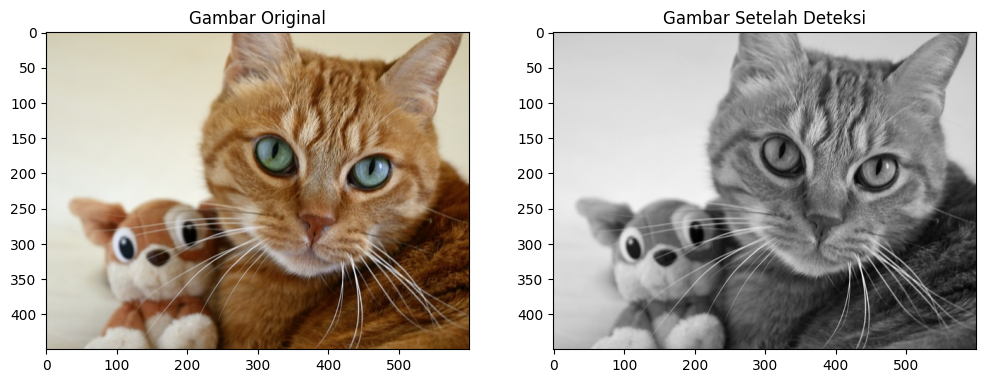

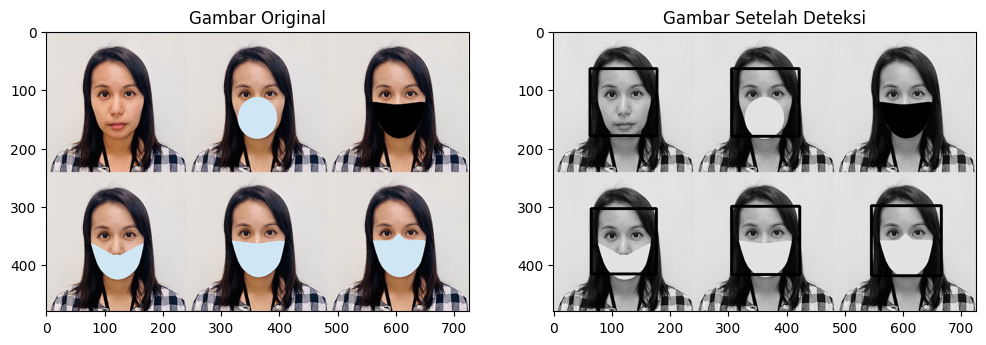

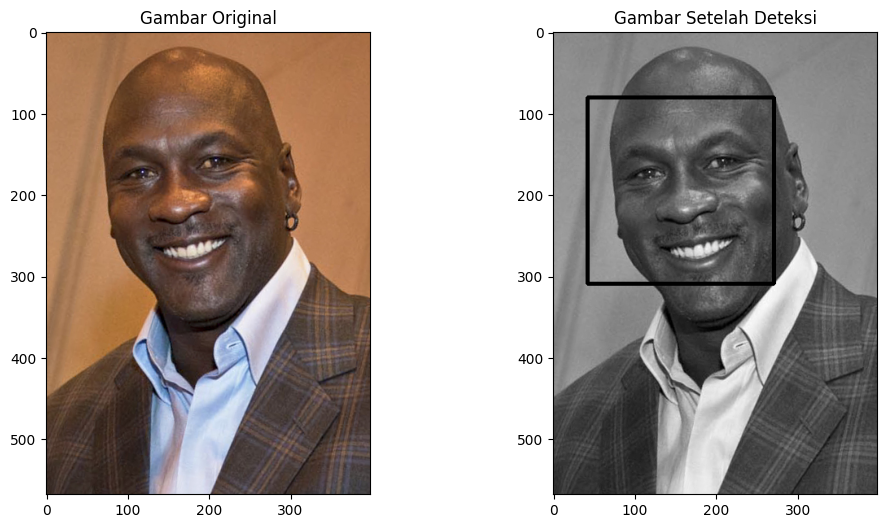

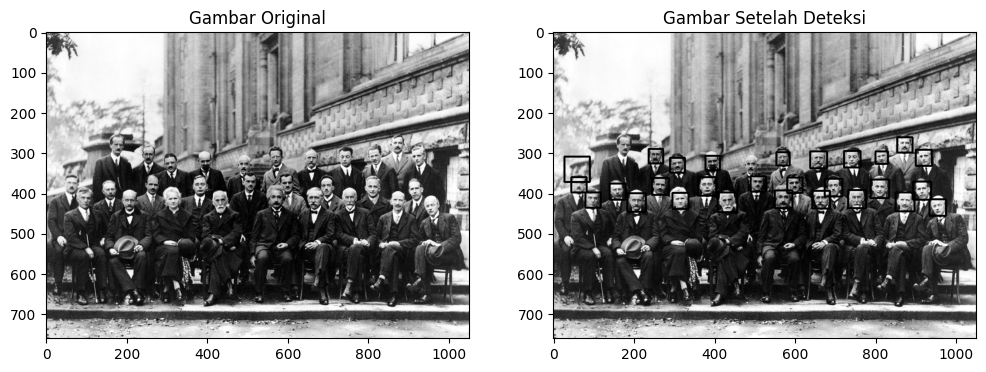

In [ ]:
# Inisialisasi classifier wajah
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalface_alt.xml')

# Fungsi untuk menampilkan gambar dengan kotak di sekitar wajah
def face_detection(image_path, cascade_classifier):
    img = cv.imread(image_path)

    if img is not None:
        gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        # Deteksi wajah
        roi_wajah = cascade_classifier.detectMultiScale(gray_img)

        # Gambar kotak di sekitar wajah pada gambar setelah deteksi
        for (x, y, w, h) in roi_wajah:
            cv.rectangle(gray_img, (x, y), (x+w, y+h), (0, 255, 0), 3)

        # Tampilkan gambar asli tanpa kotak di sekitar wajah
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title('Gambar Original')

        # Tampilkan gambar setelah deteksi
        plt.subplot(1, 2, 2)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Gambar Setelah Deteksi')

        plt.show()
    else:
        print("Gagal membaca gambar atau gambar tidak ada.")


# Jokowi
face_detection('/content/drive/MyDrive/PCVK/Face Detection/jokowi.jpg', cascade_wajah)

# RA.Kartini
face_detection('/content/drive/MyDrive/PCVK/Face Detection/kartini.jpg', cascade_wajah)

# Kucing
face_detection('/content/drive/MyDrive/PCVK/Face Detection/kucing2.jpg', cascade_wajah)

# Perempuan Maskeran
face_detection('/content/drive/MyDrive/PCVK/Face Detection/mask.png', cascade_wajah)

# M. Jordan
face_detection('/content/drive/MyDrive/PCVK/Face Detection/mjordan.jpg', cascade_wajah)

# Kelompok
face_detection('/content/drive/MyDrive/PCVK/Face Detection/solvayconf.jpg', cascade_wajah)

##Langkah 3
Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing
hingga muncul rectangle pada bagian wajahnya seperti gambar berikut. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika
memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

<Figure size 1000x1000 with 0 Axes>

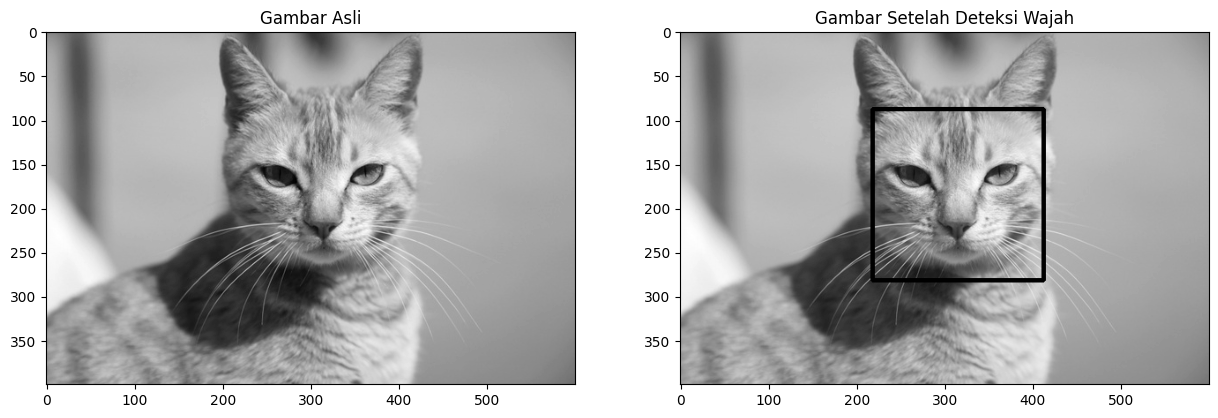

In [ ]:
# Nomor 3 (Cat Face Det)
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalcatface.xml')

kucing = cv.imread('/content/drive/MyDrive/PCVK/Face Detection/mycat.jpg', 0)
kucing1 = cv.imread('/content/drive/MyDrive/PCVK/Face Detection/mycat.jpg', 0)

# Penyesuaian parameter
scaleFactor = 1.03
minNeighbors = 60
minSize = (100, 100)

roi_wajah = cascade_wajah.detectMultiScale(kucing1, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)

for (x, y, w, h) in roi_wajah:
    cv.rectangle(kucing1, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Konversi tipe data citra ke uint8
kucing = kucing.astype('uint8')
kucing1 = kucing1.astype('uint8')

plt.figure(figsize=(10, 10))
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121), plt.imshow(kucing, cmap='gray')
plt.title('Gambar Asli')
plt.subplot(122), plt.imshow(kucing1, cmap='gray')
plt.title('Gambar Setelah Deteksi Wajah')
plt.show()


##Langkah 4
Cobakan juga untuk eyes detection pada gambar “Jokowi.jpg”, sehingga menghasilkan gambar seperti berikut.

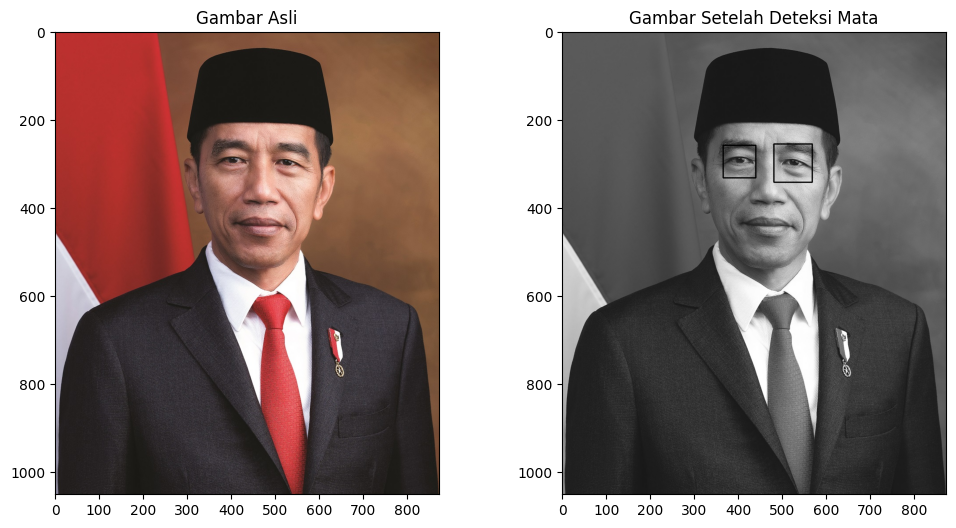

In [ ]:
# Path gambar
image_path = '/content/drive/MyDrive/PCVK/Face Detection/jokowi.jpg'

# Baca gambar
jokowi_img = cv.imread(image_path)
jokowi_gray = cv.cvtColor(jokowi_img, cv.COLOR_BGR2GRAY)

# Salin gambar untuk digunakan dalam deteksi mata
jokowi_img_eyes = jokowi_gray.copy()

# Gunakan classifier mata bawaan OpenCV
cascade_eyes = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

# Deteksi mata
roi_eyes = cascade_eyes.detectMultiScale(jokowi_gray)

# Gambar kotak di sekitar mata pada gambar asli
for (ex, ey, ew, eh) in roi_eyes:
    cv.rectangle(jokowi_img_eyes, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Tampilkan gambar asli
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(jokowi_img, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

# Tampilkan gambar setelah deteksi mata
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(jokowi_img_eyes, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Deteksi Mata')
plt.show()


##Langkah 5
Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses
kamera dan FaceDetection pada google colab dapat dilihat di link berikut:
https://www.youtube.com/watch?v=YiWh7QvVH60

<IPython.core.display.Javascript object>

(480, 640)
Saved to Aul.jpg


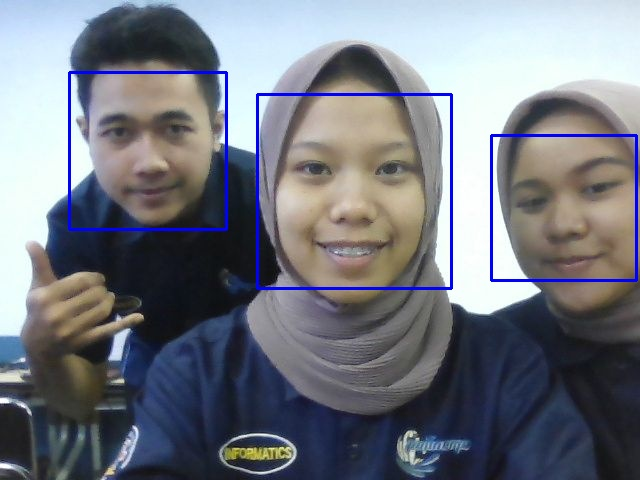

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalface_alt.xml')
def take_photo(filename='Kelompok8.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('Aul.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

##Langkah 6
Lakukan deteksi bagian wajah gambar “mjordan.jpg”, kemudian tindih bagian wajah tersebut
dengan gambar “smile.png”. Berikut contoh keluarannya.

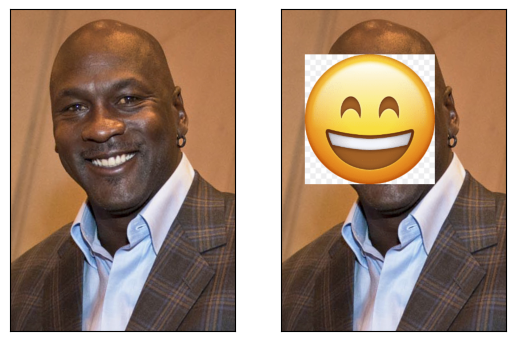

In [ ]:
def face_recognition_smile(img, scaleFactor, minNeighbors):
  # Mengcopy gambar yang akan ditambahkan gambar smile
  img_rectangle = img.copy()

  # Merubah gambar menjadi gray
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # Mengimport file xml yang berisikan algoritm haar cascade yang akan digunakan untuk face detection
  haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalface_alt.xml')

  # Memasukkan gambar, scaleFactor, dan minNeightbors untuk dilakukan face detection kemudian dicari koordinatnya
  rectangle = haar_cascade.detectMultiScale(img_gray, scaleFactor, minNeighbors)

  # Menggambar gambar smile dari koordinat yang didapat
  smile = cv.imread('/content/drive/MyDrive/PCVK/Face Detection/smile.png')
  for (x, y, w, h) in rectangle:
    smile_resize = cv.resize(smile, (w, h))
    img_rectangle[y:y+h, x:x+w] = smile_resize

  # Menampilkan gambar
  fig, ax = plt.subplots(1,2)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].set_xticks([])
  ax[0].set_yticks([])
  ax[1].imshow(cv.cvtColor(img_rectangle, cv.COLOR_BGR2RGB))
  ax[1].set_xticks([])
  ax[1].set_yticks([])

  # Menampilkan gambar smile pada face detection
face_recognition_smile(cv.imread('/content/drive/MyDrive/PCVK/Face Detection/mjordan.jpg'), 1.1, 9)

##Langkah 7
Lakukan deteksi wajah dengan menggunakan bounding box berwarna hitam, deteksi mata menggunakan bounding box berwarna putih, dan deteksi mata kanan menggunakan bounding box berwarna merah. Gunakan gambar “people.jpg” untuk mengerjakan soal pada nomor ini. Berikut
contoh keluarannya.

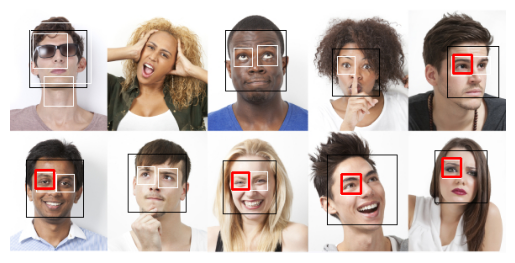

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Fungsi untuk face recognition, eyes detection, dan right eye detection
def face_recognition_eyes_detection(img, scaleFactor, minNeighbors):
    # Mengcopy gambar yang akan ditambahkan rectangle
    img_rectangle = img.copy()

    # Merubah gambar menjadi gray
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Menggunakan Cascade Classifier untuk face detection, eyes detection, dan right eyes detection
    face_detec = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt.xml')
    eyes_detec = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')
    right_eye_detec = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_righteye_2splits.xml')

    # Memasukkan gambar, scaleFactor, dan minNeighbors untuk dilakukan face, eyes, dan right eyes detection kemudian dicari koordinatnya
    rectangle_face = face_detec.detectMultiScale(img_gray, scaleFactor, minNeighbors)
    rectangle_eyes = eyes_detec.detectMultiScale(img_gray, scaleFactor, minNeighbors)
    rectangle_right_eyes = right_eye_detec.detectMultiScale(img_gray, scaleFactor, minNeighbors)

    # Menggambar rectangle dari koordinat yang didapat
    for (x, y, w, h) in rectangle_face:
        cv.rectangle(img_rectangle, (x, y), (x + w, y + h), (0, 0, 0), 1)

    for (x, y, w, h) in rectangle_eyes:
        cv.rectangle(img_rectangle, (x, y), (x + w, y + h), (255, 255, 255), 1)

    for (x, y, w, h) in rectangle_right_eyes:
        cv.rectangle(img_rectangle, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Menampilkan gambar
    plt.imshow(cv.cvtColor(img_rectangle, cv.COLOR_BGR2RGB))
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()

# Melakukan face detection, eyes detection, dan right eye detection pada gambar
face_recognition_eyes_detection(cv.imread('/content/drive/MyDrive/PCVK/Face Detection/people.jpg'), 1.1, 3)
